Function that generates a signal consisting of an arbitrary frequency components
$$f(t) = A_0 + \sum^n_{i=1} A_i \cdot sin(2 \pi F_i \cdot t)$$

In [1]:
import numpy as np

def generateSignal(frequencies: np.array, 
                   amplitudes: np.array, 
                   offset: float, 
                   duration: float, 
                   rate: float):
    
    times = np.arange(0, duration, 1 / rate)
    freq_components = np.array([amplitudes * np.sin(2 * np.pi * t * frequencies) for t in times])
    return offset + np.sum(freq_components, axis=1)

Defining an example to test the function

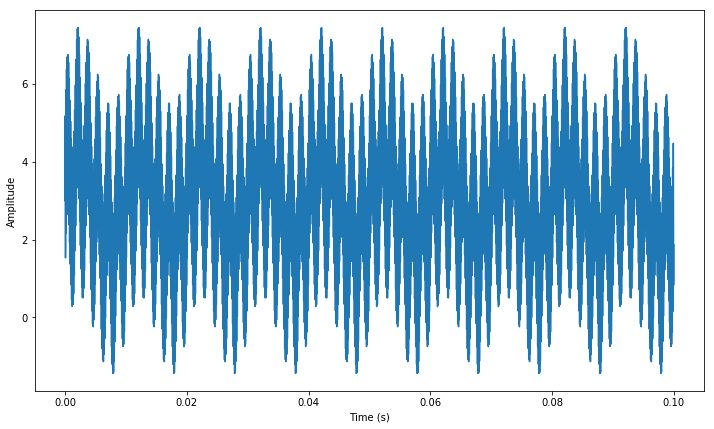

In [3]:
import matplotlib.pyplot as plt

example = {
    'frequencies': np.array([100, 600, 9000]),
    'amplitudes' : np.array([1, 1.5, 2]),
    'offset'     : 3,
    'duration'   : 1,
    'rate'       : 1e5
}

plt.figure(figsize=(12,7))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(0, 1, 1 / 1e5)[:10000], generateSignal(**example)[:10000])

Calculating the spectrum with Fast Fourier Transform.

In [4]:
def calculateSpectrum(signal: np.array, rate: float):
    N = signal.size 
    
    fft = np.abs(np.fft.fft(signal, axis=0)) / N
    
    single_sided = fft[:N // 2]
    single_sided[1:] += np.flip(fft[N // 2 + 1:])

    freq = np.fft.fftfreq(N)[:N // 2] * rate
    
    return single_sided, freq

Testing this function by using the previously defined function

Text(0, 0.5, 'Amplitude')

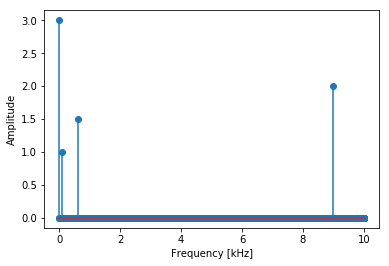

In [6]:
example['rate'] = 2e4

signal = generateSignal(**example)
N = signal.size 

fft, fftfreq = calculateSpectrum(signal, example['rate'])
fig, ax = plt.subplots()

ax.stem(fftfreq / 1e3, fft)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Amplitude')